In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/YELP/yelp_3cities_refined.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df

,business_id,user_id,review_stars,useful_x,text,date
0,Kv85DtmBK14Is2YRf7LDIQ,I-0Be1dHEacp293TeRUDpw,5,0,Wow- the best sandwich I've had in a very long...,2019-01-22 00:53:22
1,6DwR5rF1s6fJn4f-Lvfbuw,I-0Be1dHEacp293TeRUDpw,5,0,Everything from the food to the drinks to the ...,2019-06-22 05:00:12
2,BvpABPKyg0w54Xnrt_Ifrg,I-0Be1dHEacp293TeRUDpw,5,0,Absolutely delicious coffee in rapidly changin...,2020-03-08 19:55:43
3,FznRWr68zgIV-SkOGNveow,I-0Be1dHEacp293TeRUDpw,5,0,The owner and staff are incredibly sweet and k...,2020-03-14 18:24:31
4,MRYWsqLbAkPzdKgHeSepZA,I-0Be1dHEacp293TeRUDpw,5,0,Such a tasty burrito and the salas are tasty. ...,2020-12-03 02:47:14
...,...,...,...,...,...,...
197944,6f4wzV8gi3SBSbigMFuLdA,nKN2AJWiArA8IeOUExyB8w,5,0,Just had takeout from Golden Dynasty. \nGenera...,2020-12-17 01:22:03
197945,Ii-aCAM4KG6RCvpMn0hOkg,e-DXoZTMNzDOhHMrYZN5zQ,4,0,Totally solid Thai food. Not bad at all. I've ...,2019-06-19 01:22:54
197946,Uo6k2_14sdUhVJF9YxnMcg,iSxnRdziDntu5TL3ki_bfQ,5,0,"Our server Joey was great! She was so kind, we...",2020-08-06 04:22:45
197947,aesuEZoyNuctrsKzo-OIUA,icBK1FERu8d_uU6cBwy2Uw,5,0,This place is amazing!! Had the burrito last t...,2020-05-14 21:37:18


In [ ]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [ ]:
df

,business_id,user_id,review_stars,useful_x,text,date
0,Kv85DtmBK14Is2YRf7LDIQ,I-0Be1dHEacp293TeRUDpw,5,0,Wow- the best sandwich I've had in a very long...,2019-01-22
1,6DwR5rF1s6fJn4f-Lvfbuw,I-0Be1dHEacp293TeRUDpw,5,0,Everything from the food to the drinks to the ...,2019-06-22
2,BvpABPKyg0w54Xnrt_Ifrg,I-0Be1dHEacp293TeRUDpw,5,0,Absolutely delicious coffee in rapidly changin...,2020-03-08
3,FznRWr68zgIV-SkOGNveow,I-0Be1dHEacp293TeRUDpw,5,0,The owner and staff are incredibly sweet and k...,2020-03-14
4,MRYWsqLbAkPzdKgHeSepZA,I-0Be1dHEacp293TeRUDpw,5,0,Such a tasty burrito and the salas are tasty. ...,2020-12-03
...,...,...,...,...,...,...
197944,6f4wzV8gi3SBSbigMFuLdA,nKN2AJWiArA8IeOUExyB8w,5,0,Just had takeout from Golden Dynasty. \nGenera...,2020-12-17
197945,Ii-aCAM4KG6RCvpMn0hOkg,e-DXoZTMNzDOhHMrYZN5zQ,4,0,Totally solid Thai food. Not bad at all. I've ...,2019-06-19
197946,Uo6k2_14sdUhVJF9YxnMcg,iSxnRdziDntu5TL3ki_bfQ,5,0,"Our server Joey was great! She was so kind, we...",2020-08-06
197947,aesuEZoyNuctrsKzo-OIUA,icBK1FERu8d_uU6cBwy2Uw,5,0,This place is amazing!! Had the burrito last t...,2020-05-14


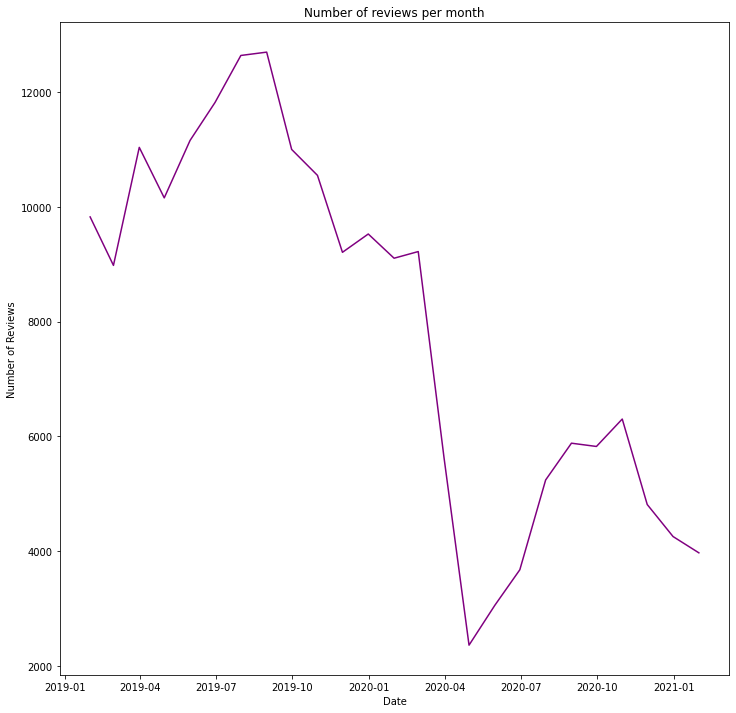

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))
import matplotlib.pyplot as plt
import datetime
import pandas as pd
df['date'] = pd.to_datetime(df['date'])
#df['year'] = pd.DatetimeIndex(df['new_date']).year

#df['date']=df['year']
df = df.set_index('date')
y = df['text'].resample('M').count()

# Add x-axis and y-axis
ax.plot(y,color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of Reviews",
       title="Number of reviews per month")

# Define the date format
#date_form = DateFormatter("%Y")
#ax.xaxis.set_major_formatter(date_form)

plt.show()

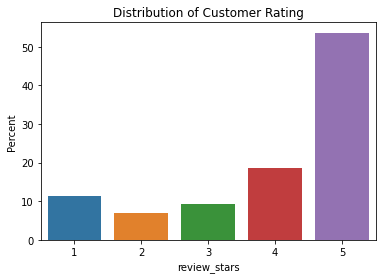

In [ ]:
import seaborn as sns
ax = sns.barplot(data=df, x='review_stars', y='review_stars', estimator=lambda x: 
                 len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

KeyError: ignored

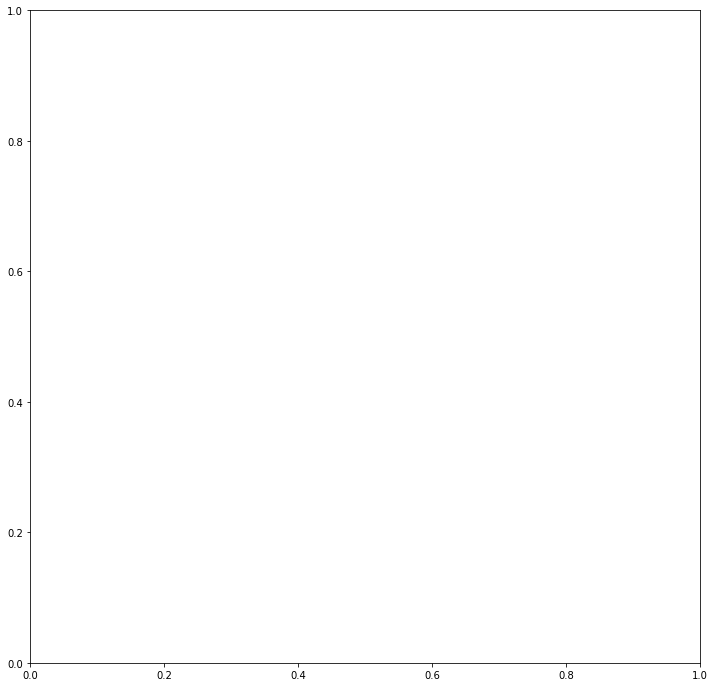

In [ ]:
#plt.plot(df['review_stars'].resample('M').mean())
#plt.xlabel('Year')
#plt.ylabel('review_stars')
#plt.title('Average Monthly Customer Rating')
#plt.ylim(0,5)
#plt.show()


# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))
import matplotlib.pyplot as plt
import datetime
import pandas as pd
df['date'] = pd.to_datetime(df['date'])
#df['year'] = pd.DatetimeIndex(df['new_date']).year

#df['date']=df['year']
df = df.set_index('date')
y = df['review_stars'].resample('M').count()

# Add x-axis and y-axis
ax.plot(y,color='purple')

# Set title and labels for axes
ax.set(xlabel="Year",
       ylabel="review_stars",
       title="Average Monthly Customer Rating")

# Define the date format
#date_form = DateFormatter("%Y")
#ax.xaxis.set_major_formatter(date_form)

plt.show()

In [ ]:
df['text'] = [i.replace("&amp;amp;", '').replace("\'",'') for i in df['text']]

Text(0.5, 1.0, 'Review Stars')

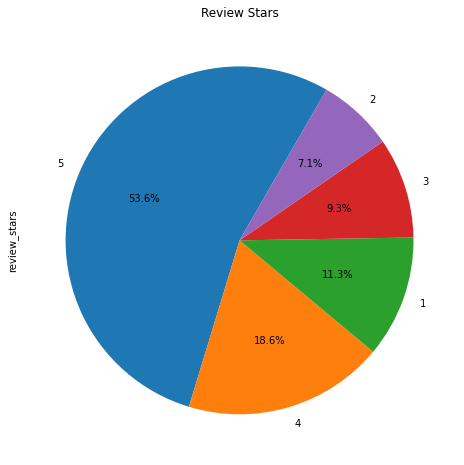

In [ ]:
#Let's see the distribution of each star rating as a pie chart
#This way we can see that most of our data contains positive comments by costumers
plt.figure(figsize=(8,8))
df['review_stars'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Review Stars')